In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [102]:
i = 1
df = pd.read_csv(f'SW_EXTD_EFIA_LP_HM_202301{i if i >= 10 else f"0{i}"}T000000_202301{i if i >= 10 else f"0{i}"}T235959_0101.txt.zip', compression='zip', sep='   ', quotechar='"', skiprows=4, index_col=False, header=None).drop(0, axis=1).\
        rename({1:'Timestamp', 2:'Latitude', 3:'Longitude', 4:'Height', 5:'Radius', 6:'SZA', 7:'SAz', 8:'ST', 9:'n', 10:'Te_hgn', 11:'Te_lgn', 12:'T_elec'}, axis=1)

/tmp/ipykernel_19682/4225769519.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(f'SW_EXTD_EFIA_LP_HM_202301{i if i >= 10 else f"0{i}"}T000000_202301{i if i >= 10 else f"0{i}"}T235959_0101.txt.zip', compression='zip', sep='   ', quotechar='"', skiprows=4, index_col=False, header=None).drop(0, axis=1).\


In [103]:
df.shape

(171434, 12)

In [114]:
import os

files_with_nans = list()
path = 'data'
for file in os.listdir(path):
    df = pd.read_csv('data/' + file, compression='zip', sep='   ', quotechar='"', skiprows=4, index_col=False, header=None).drop(0, axis=1).\
        rename({1:'Timestamp', 2:'Latitude', 3:'Longitude', 4:'Height', 5:'Radius', 6:'SZA', 7:'SAz', 8:'ST', 9:'n', 10:'Te_hgn', 11:'Te_lgn', 12:'T_elec'}, axis=1)
    if df.isna().sum()[df.isna().sum() != 0].shape[0] != 0:
        files_with_nans.append(file)

/tmp/ipykernel_19682/3562099061.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('data/' + file, compression='zip', sep='   ', quotechar='"', skiprows=4, index_col=False, header=None).drop(0, axis=1).\
/tmp/ipykernel_19682/3562099061.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('data/' + file, compression='zip', sep='   ', quotechar='"', skiprows=4, index_col=False, header=None).drop(0, axis=1).\
/tmp/ipykernel_19682/3562099061.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df 

In [117]:
len(files_with_nans)

91

In [121]:
files_with_nans[0]

'SW_EXTD_EFIA_LP_HM_20230613T000000_20230613T235959_0101.txt.zip'

In [118]:
df = pd.read_csv('data/' + files_with_nans[0], compression='zip', sep='   ', quotechar='"', skiprows=4, index_col=False, header=None).drop(0, axis=1).\
         rename({1:'Timestamp', 2:'Latitude', 3:'Longitude', 4:'Height', 5:'Radius', 6:'SZA', 7:'SAz', 8:'ST', 9:'n', 10:'Te_hgn', 11:'Te_lgn', 12:'T_elec'}, axis=1)

/tmp/ipykernel_19682/2575275803.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('data/' + files_with_nans[0], compression='zip', sep='   ', quotechar='"', skiprows=4, index_col=False, header=None).drop(0, axis=1).\
/tmp/ipykernel_19682/2575275803.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('data/' + files_with_nans[0], compression='zip', sep='   ', quotechar='"', skiprows=4, index_col=False, header=None).drop(0, axis=1).\


In [119]:
df.isna().sum()

Timestamp     0
Latitude      0
Longitude     0
Height        0
Radius        0
SZA           0
SAz           0
ST            0
n            11
Te_hgn        0
Te_lgn        0
T_elec        0
dtype: int64

In [120]:
df[df.n.isna()]

,Timestamp,Latitude,Longitude,Height,Radius,SZA,SAz,ST,n,Te_hgn,Te_lgn,T_elec
102145,14:18:01.696,-86.5358,-70.1435,515.920,6872.75,110.389,-145.1500,9.6233,NaN,0.0,4197.00,13867.60
102195,14:18:26.696,-85.3540,-55.3280,515.847,6872.74,108.864,-159.8930,10.6180,NaN,0.0,3722.29,5613.86
112932,15:48:37.197,-77.7195,148.6090,514.950,6872.68,124.148,-28.8400,1.7165,NaN,0.0,2077.61,-28749.00
113203,15:50:53.696,-85.7036,173.5380,515.872,6872.75,115.867,-52.7916,3.4163,NaN,0.0,3094.61,-7230.56
113228,15:51:06.197,-86.2948,-179.0320,515.905,6872.75,115.107,-60.1584,3.9151,NaN,0.0,9921.13,18618.90
113266,15:51:25.197,-87.0146,-162.5720,515.939,6872.75,113.950,-76.5302,5.0177,NaN,0.0,2481.54,8813.89
113330,15:51:58.197,-87.2885,-120.2340,515.948,6872.75,111.939,-118.7350,7.8494,NaN,0.0,2822.39,4176.43
113351,15:52:08.696,-87.0560,-107.6920,515.939,6872.75,111.299,-131.2390,8.6885,NaN,0.0,3776.38,6245.78
157541,22:03:19.696,-67.4165,48.7490,512.671,6872.60,134.171,-25.3846,1.3034,NaN,0.0,2231.04,14965.90
157554,22:03:26.197,-67.8238,48.8517,512.788,6872.61,133.782,-25.3792,1.3120,NaN,0.0,21887.90,-6674.74


In [92]:
df.isna().sum()[df.isna().sum() != 0].shape[0]

0

In [ ]:
df = pd.read_csv(f'SW_EXTD_EFIA_LP_HM_20230613T000000_20230613T235959_0101.txt.zip', compression='zip', sep='   ', quotechar='"', skiprows=4, index_col=False, header=None).drop(0, axis=1).\
         rename({1:'Timestamp', 2:'Latitude', 3:'Longitude', 4:'Height', 5:'Radius', 6:'SZA', 7:'SAz', 8:'ST', 9:'n', 10:'Te_hgn', 11:'Te_lgn', 12:'T_elec'}, axis=1)

<Axes: xlabel='T_elec', ylabel='Count'>

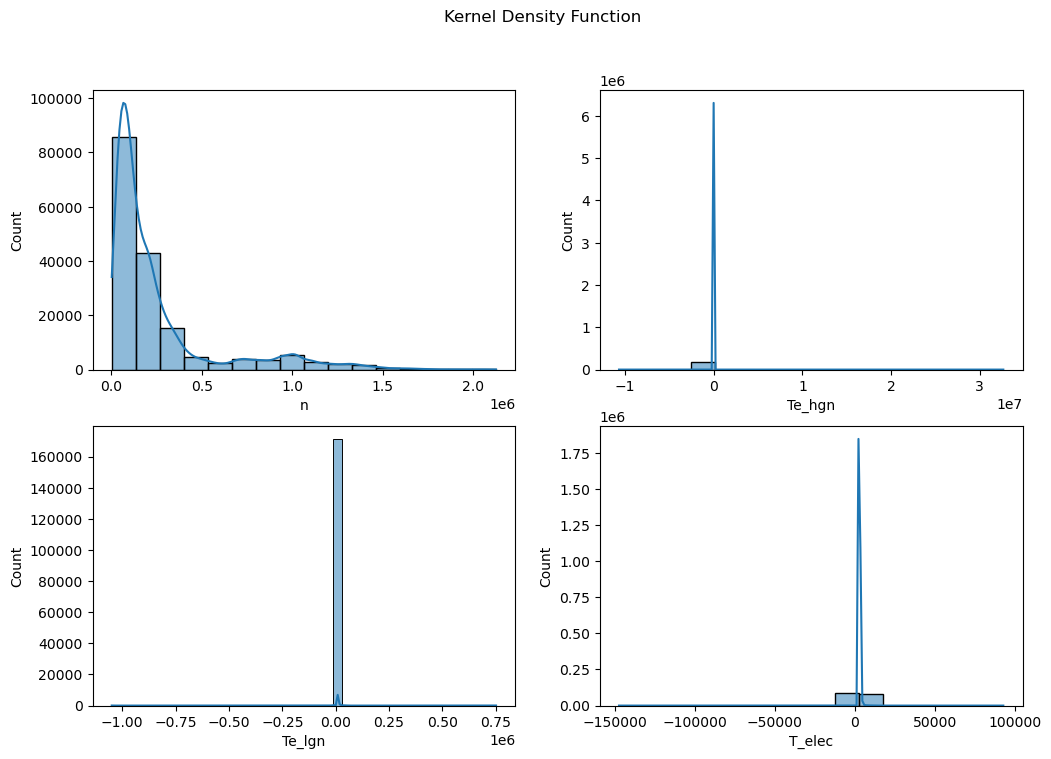

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

fig.suptitle('Kernel Density Function')

sns.histplot(ax=axes[0, 0], data = df, x='n', kde=True, bins = 16, common_norm=False)
sns.histplot(ax=axes[0, 1], data = df, x='Te_hgn', kde=True, bins = 16, common_norm=False)
sns.histplot(ax=axes[1, 0], data = df, x='Te_lgn', kde=True, bins = 40, common_norm=False)
sns.histplot(ax=axes[1, 1], data = df, x='T_elec', kde=True, bins = 16, common_norm=False)

Уберём выбросы в Te_hgn.

In [72]:
index2drop = df.Te_hgn[(df.Te_hgn < df.Te_hgn.quantile(0.01)) | (df.Te_hgn > df.Te_hgn.quantile(0.99))].index
df.drop(index2drop, inplace=True)
print(len(index2drop))

3430


Уберём выбросы в Te_lgn.

In [73]:
index2drop = df.Te_lgn[(df.Te_lgn < df.Te_lgn.quantile(0.01)) | (df.Te_lgn > df.Te_lgn.quantile(0.99))].index
df.drop(index2drop, inplace=True)
print(len(index2drop))

3362


Уберём выбросы в T_elec.

In [74]:
index2drop = df.T_elec[(df.T_elec < df.T_elec.quantile(0.01)) | (df.T_elec > df.T_elec.quantile(0.99))].index
df.drop(index2drop, inplace=True)
print(len(index2drop))

3294


<Axes: xlabel='T_elec', ylabel='Count'>

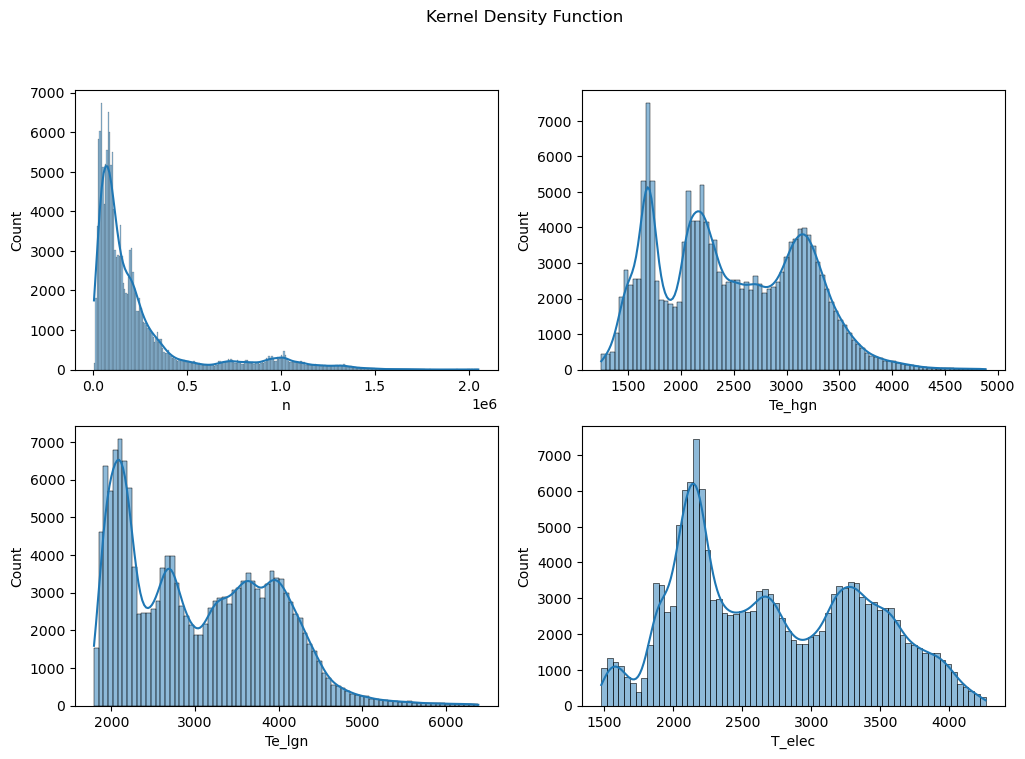

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

fig.suptitle('Kernel Density Function')

sns.histplot(ax=axes[0, 0], data = df, x='n', kde=True, common_norm=False)
sns.histplot(ax=axes[0, 1], data = df, x='Te_hgn', kde=True, common_norm=False)
sns.histplot(ax=axes[1, 0], data = df, x='Te_lgn', kde=True, common_norm=False)
sns.histplot(ax=axes[1, 1], data = df, x='T_elec', kde=True, common_norm=False)

<Axes: >

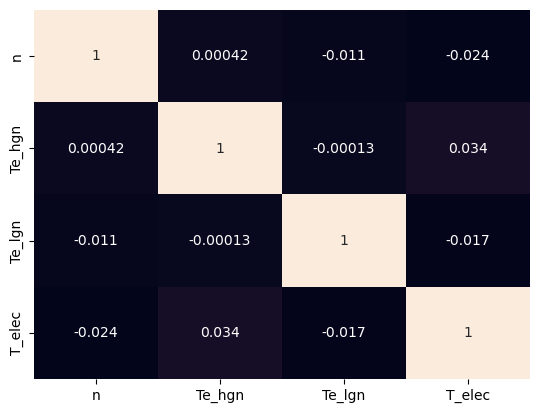

In [126]:
sns.heatmap(data = df[['n', 'Te_hgn', 'Te_lgn', 'T_elec']].corr(), cbar=False, annot=True)